📦 **1. Essential Python Libraries Setup**

> *Import all necessary libraries for data handling, deep learning, and Google Drive access.*

In [10]:
# > *Import all necessary libraries for data handling, deep learning, and Google Drive access.*
# %%
# Standard library modules
import os          # For interacting with the operating system (file paths, directories)
import json        # For reading and writing JSON data
import time        # For time-based operations (e.g., delays, timestamps)
from datetime import datetime


# Numerical and data processing libraries
import numpy as np                     # For numerical computations and array operations
import pandas as pd                   # For structured data manipulation and analysis
import matplotlib.pyplot as plt       # For basic plotting and data visualization

# Data normalization and preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For feature scaling

# Deep learning tools from TensorFlow for building and training LSTM models
from tensorflow.keras.models import Sequential                  # To create linear stack of layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input # LSTM for sequences, Dense for output, Dropout for regularization
from tensorflow.keras.callbacks import EarlyStopping            # To stop training early if model stops improving
from tensorflow.keras.optimizers import Adam                    # Optimizer for gradient descent

# 📉 Financial plotting library
!pip install mplfinance  # Install mplfinance for candlestick-style charts (only for Colab, not needed in regular script)
import mplfinance as mpf  # Used to visualize financial time series like stock candles

# ⚙️ ML evaluation metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
)  # Tools to evaluate classification model performance

# ⚡ Boosted tree classifier, often used for comparison with deep models
from xgboost import XGBClassifier

# 🧰 Data structure for handling grouped or default values (e.g., time series buckets)
from collections import defaultdict

# 📂 Enable access to Google Drive when using Google Colab for storing/loading data
from google.colab import drive

# Install and import technical analysis library
!pip install ta
from ta.trend import MACD, ADXIndicator
from ta.momentum import StochasticOscillator
from ta.volatility import BollingerBands

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=23fe2c19042c212c4f6c4df9995d3801de2e2a90323895c63d6e1d728115bd3f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


 🔗 **2. Connect to Google Drive**

> *Mount Google Drive to access JSON stock data directly within this Colab environment.*

In [2]:
# Mount Google Drive to access JSON data files stored in the user's Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📂 **3. Load & Structure JSON Stock Data by Ticker**

> *Automatically detect, group, and load all stock JSON files—organized by ticker and indicator—for seamless access and processing.*

In [3]:
# Step 1: Set the absolute path to the folder in Google Drive containing JSON files
# Each file is assumed to represent an indicator (e.g., ADX, RSI) for a specific stock ticker
folder_path = '/content/drive/MyDrive/Stock_data'

# Step 2: Retrieve all JSON filenames in the directory
# Only files ending in `.json` are considered for processing
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# Step 3: Group JSON files by ticker symbol
# Assumes filenames are in the format: TICKER_INDICATOR.json (e.g., AAPL_adx.json)
files_by_ticker = defaultdict(list)
for file_name in json_files:
    ticker = file_name.split('_')[0].strip()  # Extract ticker before the first underscore
    files_by_ticker[ticker].append(file_name)

# ✅ Debug print: shows tickers and associated indicator files
print(files_by_ticker)

# Step 4: Load JSON content into a nested dictionary
# Structure: ticker_data[ticker][indicator] = parsed_json_data
ticker_data = {}
for ticker, files in files_by_ticker.items():
    ticker_data[ticker] = {}  # Initialize ticker key
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)  # Full path to JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)  # Load the JSON content
        # Use the indicator name from the filename as dictionary key
        key = file_name[len(ticker)+1:-5].strip().lower()  # Remove ticker and .json extension
        ticker_data[ticker][key] = data  # Store under corresponding indicator

# Step 5: 🔍 Access example: print the 'time_series' data from 'AAPL'
# Make sure 'time_series' exists in the indicator data (validate before production use)
print(ticker_data['AAPL']['time_series'])

defaultdict(<class 'list'>, {'AAPL': ['AAPL_adx.json', 'AAPL_ema.json', 'AAPL_rsi.json', 'AAPL_time_series.json', 'AAPL_heikinashicandles.json'], 'MSFT': ['MSFT_adx.json', 'MSFT_ema.json', 'MSFT_rsi.json', 'MSFT_heikinashicandles.json', 'MSFT_time_series.json'], 'MSTR': ['MSTR_adx.json', 'MSTR_ema.json', 'MSTR_rsi.json', 'MSTR_heikinashicandles.json', 'MSTR_time_series.json'], 'NVDA': ['NVDA_adx.json', 'NVDA_ema.json', 'NVDA_rsi.json', 'NVDA_heikinashicandles.json', 'NVDA_time_series.json'], 'SMCI': ['SMCI_adx.json', 'SMCI_ema.json', 'SMCI_rsi.json', 'SMCI_heikinashicandles.json', 'SMCI_time_series.json']})
{'response': {'meta': {'symbol': 'AAPL', 'interval': '1min', 'currency': 'USD', 'exchange_timezone': 'America/New_York', 'exchange': 'NASDAQ', 'mic_code': 'XNGS', 'type': 'Common Stock'}, 'values': [{'datetime': '2025-01-02 09:30:00', 'open': '248.92999', 'high': '248.96001', 'low': '248.0099945', 'close': '248.17999', 'volume': '2161365'}, {'datetime': '2025-01-02 09:31:00', 'open'

📈 **4. Visualize ADX Indicator Over Time**

> *Plot the Average Directional Index (ADX) for each stock ticker to analyze trend strength and direction visually.*

📈 Plotting data for ticker: AAPL


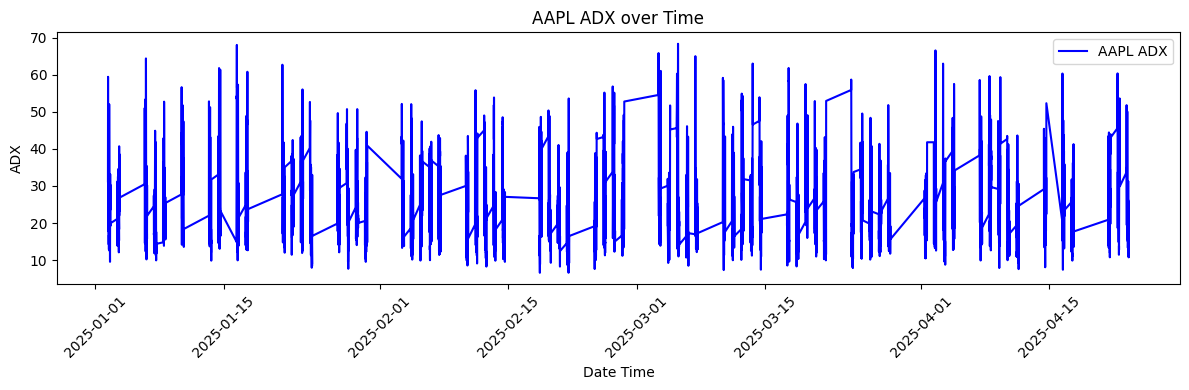

📈 Plotting data for ticker: MSFT


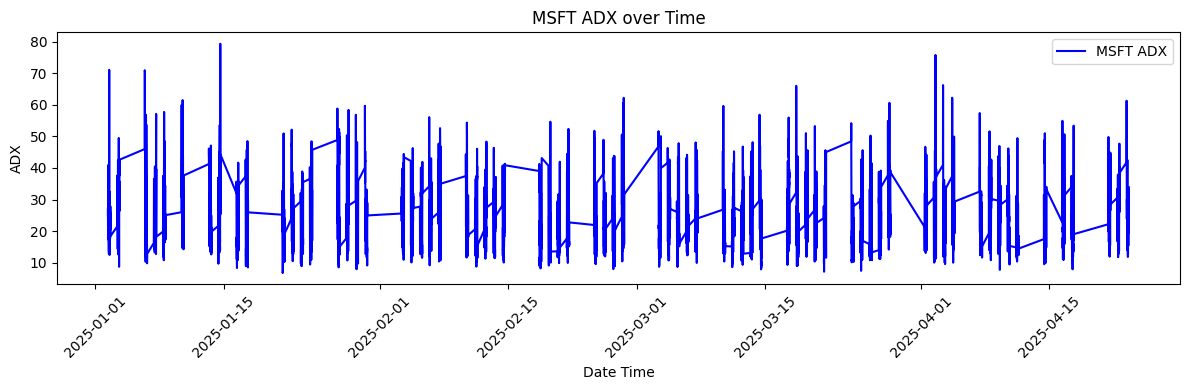

📈 Plotting data for ticker: MSTR


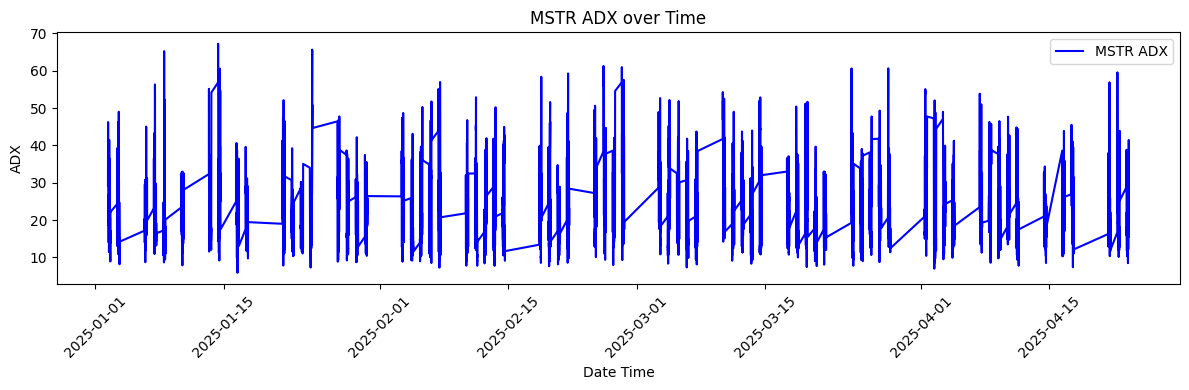

📈 Plotting data for ticker: NVDA


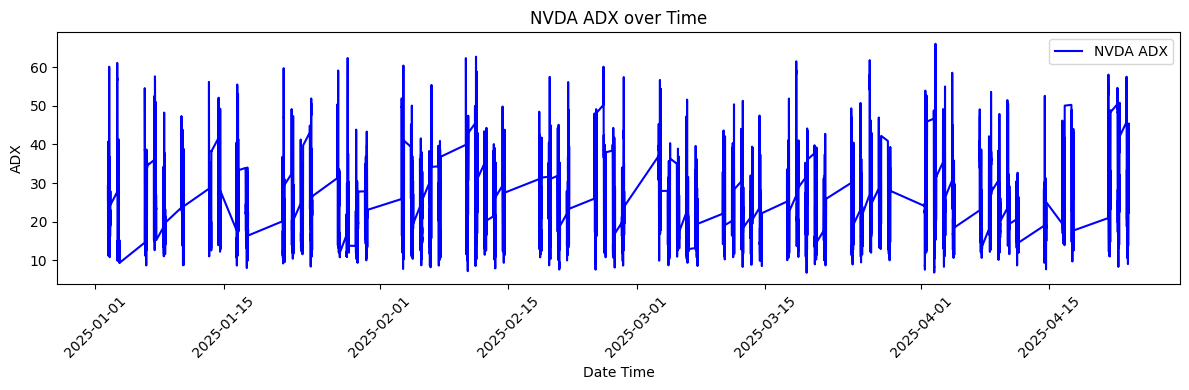

📈 Plotting data for ticker: SMCI


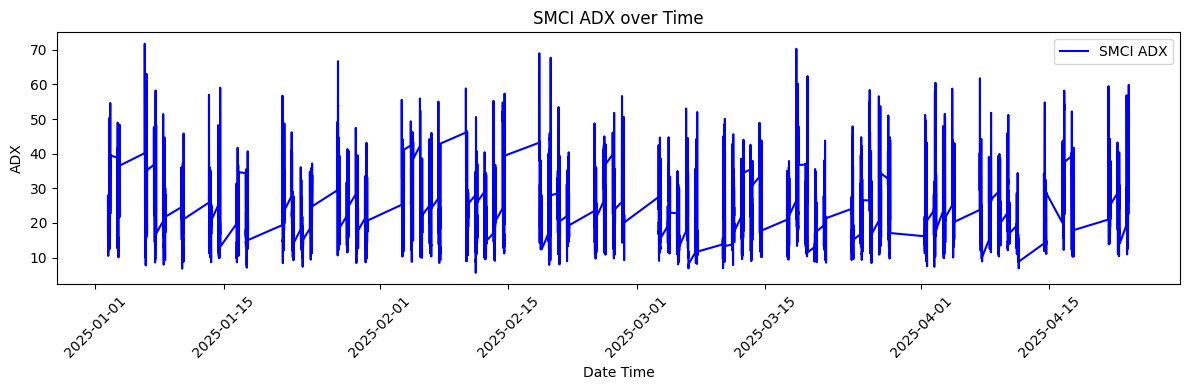

In [4]:
# Loop through each ticker and attempt to plot ADX values if present
for ticker, data_dict in ticker_data.items():
    print(f"📈 Plotting data for ticker: {ticker}")

    # --- Check if 'adx' indicator data exists ---
    if 'adx' in data_dict:
        adx_data = data_dict['adx']  # Get the ADX data dictionary
        values = adx_data['response']['values']  # Extract the list of timestamped values

        # Convert timestamp strings into datetime objects
        dates = [datetime.strptime(item['datetime'], '%Y-%m-%d %H:%M:%S') for item in values]

        # Extract ADX values and convert them to floats
        adx_values = [float(item['adx']) for item in values]

        # --- Create the plot ---
        plt.figure(figsize=(12, 4))  # Set the figure size
        plt.plot(dates, adx_values, label=f'{ticker} ADX', color='blue')  # Line plot of ADX
        plt.xlabel('Date Time')       # X-axis label
        plt.ylabel('ADX')             # Y-axis label
        plt.title(f'{ticker} ADX over Time')  # Chart title
        plt.xticks(rotation=45)       # Rotate x-axis labels for better readability
        plt.legend()                  # Display the legend
        plt.tight_layout()            # Adjust layout to prevent clipping
        plt.show()                    # Display the plot

    else:
        print(f"⚠️ No ADX data found for {ticker}")

🕯️ **5. Visualize Price Trends with Candlestick Charts**

> *Leverage `mplfinance` to render historical stock performance using candlestick charts based on time series data.*

📊 Plotting data for ticker: AAPL


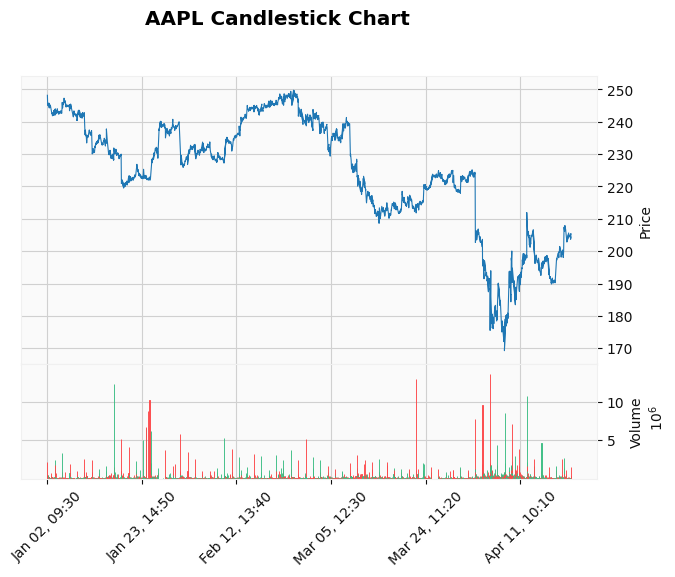

📊 Plotting data for ticker: MSFT


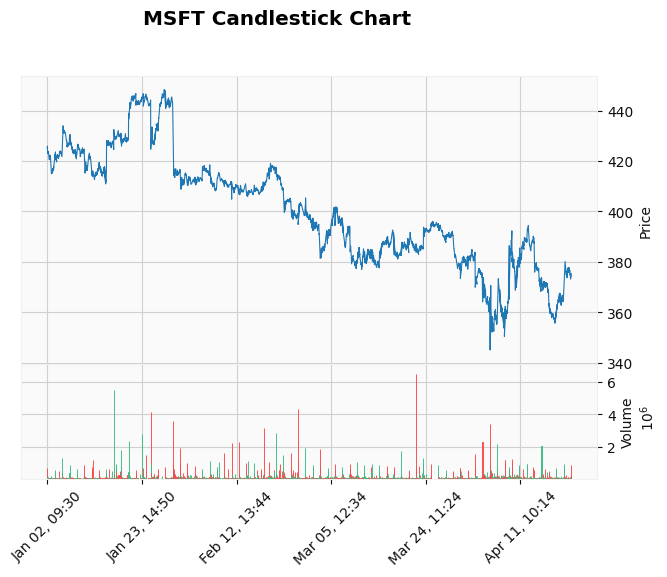

📊 Plotting data for ticker: MSTR


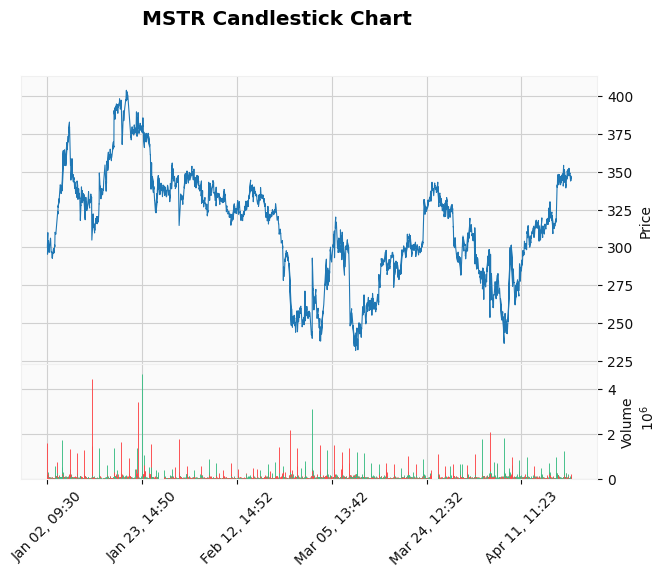

📊 Plotting data for ticker: NVDA


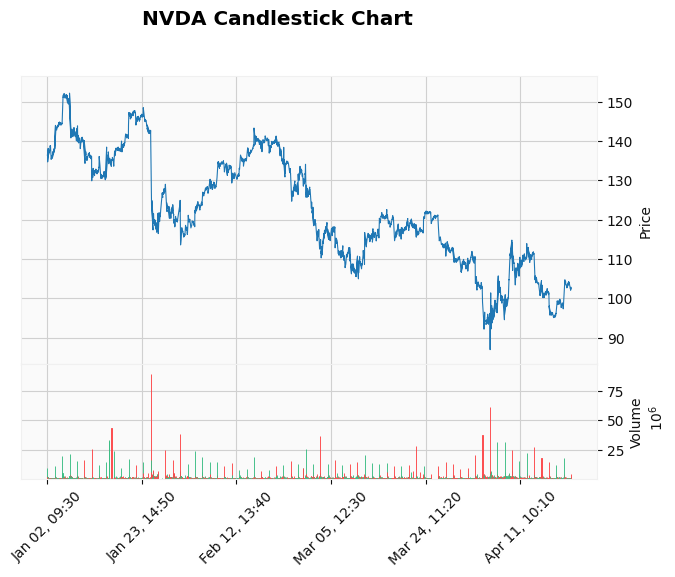

📊 Plotting data for ticker: SMCI


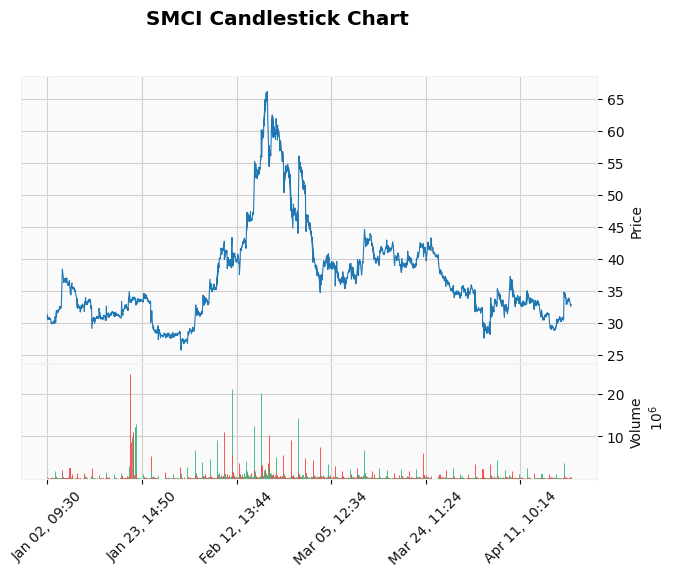

In [5]:

# Loop through each ticker in the ticker_data dictionary
for ticker, data_dict in ticker_data.items():
    print(f"📊 Plotting data for ticker: {ticker}")

    # --- Check if time series data is available ---
    if 'time_series' in data_dict:
        ts_data = data_dict['time_series']  # Get the time series dictionary
        values = ts_data['response']['values']  # Extract OHLCV records (Open, High, Low, Close, Volume)

        # ✅ Convert the list of dicts to a pandas DataFrame for easier processing
        df = pd.DataFrame(values)

        # Handle datetime conversion and indexing
        df['datetime'] = pd.to_datetime(df['datetime'])       # Convert string to datetime
        df.set_index('datetime', inplace=True)                # Set datetime as the index for time series plotting

        # Convert string-based price and volume values to numeric format
        numeric_cols = ['open', 'high', 'low', 'close', 'volume']
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Coerce errors to NaN

        # Optional: Check for nulls (can be extended to drop or fill them if needed)
        # print(df.isnull().sum())  # Uncomment for debugging

        # 🔁 Rename columns to match mplfinance expected format
        df.rename(columns={
            'open': 'Open',
            'high': 'High',
            'low': 'Low',
            'close': 'Close',
            'volume': 'Volume'
        }, inplace=True)

        # --- Plotting the candlestick chart using mplfinance ---
        mpf.plot(
            df,
            type='line',                # Use 'line' for price line chart; use 'candle' for OHLC bars
            volume=True,               # Include volume chart below price
            title=f'{ticker} Candlestick Chart',
            style='yahoo',             # Use a predefined chart style (like Yahoo Finance)
            ylabel='Price',            # Y-axis label for price
            ylabel_lower='Volume'      # Y-axis label for volume chart
        )

    else:
        print(f"⚠️ No time_series data found for {ticker}")

🧠 **6. Merge and Structure Indicator Data for Modeling**

> *Transform raw JSON indicator data into unified, time-indexed DataFrames—ready for modeling and analysis.*

In [6]:
# Initialize dictionary to hold cleaned DataFrames per ticker
merged_data = {}

# Loop over each ticker and its indicators
for ticker, indicators in ticker_data.items():
    dfs = []  # List to collect individual indicator DataFrames

    # Process each indicator like 'adx', 'rsi', etc.
    for indicator, values in indicators.items():
        df = pd.DataFrame(values['response']['values'])  # Extract value records
        df['datetime'] = pd.to_datetime(df['datetime'])  # Parse datetime
        df.set_index('datetime', inplace=True)  # Set as DataFrame index
        dfs.append(df.add_prefix(f'{indicator}_'))  # Prefix columns to avoid name clashes

    # Merge all indicators for a ticker into a single DataFrame
    merged = pd.concat(dfs, axis=1).ffill().dropna()

    # Convert all columns to numeric; invalid values coerced to NaN
    merged = merged.apply(pd.to_numeric, errors='coerce')

    # Drop rows with any NaN values after merge
    merged = merged.dropna()

    # Store result
    merged_data[ticker] = merged

# Assign to a global variable for modeling
ticker_dfs = merged_data


🎯 **7. Define Target Variable for Predictive Modeling**

> *Create a binary classification target based on profit thresholds over a rolling lookahead window.*

In [8]:
profit_target = 0.5  # Set desired profit target ($0.50 gain)
minutes = 10         # Set lookahead window (10 minutes)

# Loop through each ticker DataFrame
for ticker, df in ticker_dfs.items():
    df = df.copy()
    # Step 1: Ensure numeric types for 'high' and 'close' columns
    df.loc[:, 'time_series_high'] = pd.to_numeric(df['time_series_high'], errors='coerce')
    df.loc[:, 'time_series_close'] = pd.to_numeric(df['time_series_close'], errors='coerce')

    # Step 2: Compute max future high within the next 'minutes'
    df['future_high'] = df['time_series_high'].shift(-minutes).rolling(window=minutes).max()

    # Step 3: Set target if the price increase meets or exceeds the profit target
    df['target'] = (df['future_high'] - df['time_series_close']) >= profit_target

    # Step 4: Drop any rows with NaNs from shifting/rolling
    ticker_dfs[ticker] = df.dropna()


🧪 **8. Extract Predictive Features from Market Data**

> *Engineer essential features like returns, volatility, moving average of volume, and RSI-based overbought signals.*

In [11]:

# Iterate through each ticker's DataFrame
for ticker, df in ticker_dfs.items():
    df = df.copy()  # Work on a separate copy to avoid modifying the original reference

    # === 🔁 Basic Technical Features ===

    # Daily return as a percentage change from the previous close
    df['returns'] = df['time_series_close'].pct_change()

    # Short-term rolling volatility: standard deviation of returns (5-day window)
    df['volatility'] = df['returns'].rolling(window=5).std()

    # 5-day moving average of trading volume
    df['volume_ma'] = df['time_series_volume'].rolling(window=5).mean()

    # === 📈 RSI: Relative Strength Index ===

    # Ensure RSI values are numeric and check for overbought condition (RSI > 70)
    df['rsi_rsi'] = pd.to_numeric(df['rsi_rsi'], errors='coerce')
    df['rsi_ob'] = (df['rsi_rsi'] > 70).astype(int)

    # === 📊 MACD: Moving Average Convergence Divergence ===

    macd = MACD(df['time_series_close'])  # Initialize MACD indicator
    df['macd'] = macd.macd().shift(1)         # MACD line (shifted for next-day prediction)
    df['macd_diff'] = macd.macd_diff().shift(1)  # MACD histogram (signal strength)

    # === 📉 ADX: Average Directional Index ===

    adx = ADXIndicator(
        high=df['time_series_high'],
        low=df['time_series_low'],
        close=df['time_series_close'],
        window=10
    )
    df['adx'] = adx.adx().shift(1)            # Trend strength
    df['di_plus'] = adx.adx_pos().shift(1)    # Positive directional index
    df['di_minus'] = adx.adx_neg().shift(1)   # Negative directional index

    # === 📊 Stochastic Oscillator ===

    stoch = StochasticOscillator(
        high=df['time_series_high'],
        low=df['time_series_low'],
        close=df['time_series_close']
    )
    df['stoch_k'] = stoch.stoch().shift(1)            # %K line
    df['stoch_d'] = stoch.stoch_signal().shift(1)     # %D line (signal)

    # === 🎯 Bollinger Bands Position ===

    bb = BollingerBands(df['time_series_close'])
    bb_upper = bb.bollinger_hband().shift(1)
    bb_lower = bb.bollinger_lband().shift(1)

    # Normalized position within Bollinger Bands (0 = lower band, 1 = upper band)
    df['bb_pos'] = ((df['time_series_close'] - bb_lower) / (bb_upper - bb_lower)).clip(0, 1)

    # === 📐 Distance from EMA ===

    # Assumes 'ema_ema' (exponential moving average) is already in the DataFrame
    df['ema_distance'] = (df['time_series_close'] - df['ema_ema']).shift(1)

    # === 🧮 Additional Statistical Features ===

    # Recalculate returns with higher window
    df['returns'] = df['time_series_close'].pct_change()

    # 10-day volatility (standard deviation of returns)
    df['volatility'] = df['returns'].rolling(window=10).std()

    # 10-day moving average of volume
    df['volume_ma'] = df['time_series_volume'].rolling(window=10).mean()

    # Price vs. 10-day moving average (price position indicator)
    df['price_vs_ma'] = df['time_series_close'] / df['time_series_close'].rolling(10).mean()

    # Volume spike: current volume vs. average volume
    df['volume_spike'] = df['time_series_volume'] / df['time_series_volume'].rolling(10).mean()

    # Price changes over different time horizons
    df['price_change_5'] = df['time_series_close'].pct_change(5)
    df['price_change_15'] = df['time_series_close'].pct_change(15)

    # Volatility over 5-day window (short-term)
    df['volatility_5'] = df['returns'].rolling(5).std()

    # Drop any rows with NaN values caused by rolling windows or shifting
    ticker_dfs[ticker] = df.dropna()

# ✅ Optional: Print structure of resulting DataFrames (verify success)
print(ticker_dfs)

# For convenience, store a reference to processed data
temp = ticker_dfs

{'AAPL':                        adx_adx    ema_ema    rsi_rsi  time_series_open  \
datetime                                                                 
2025-01-02 10:13:00  22.832070  247.38286  57.473320         247.42500   
2025-01-02 10:14:00  22.139330  247.38629  58.057179         247.36000   
2025-01-02 10:15:00  21.531220  247.38103  56.934920         247.41000   
2025-01-02 10:16:00  20.092981  247.33282  51.084941         247.35030   
2025-01-02 10:17:00  19.311810  247.27224  48.404670         247.14000   
...                        ...        ...        ...               ...   
2025-04-23 15:45:00  16.394930  204.15091  56.443260         204.22501   
2025-04-23 15:46:00  15.791240  204.14273  48.861640         204.37000   
2025-04-23 15:47:00  15.230670  204.18418  54.502990         204.14000   
2025-04-23 15:48:00  15.423190  204.25935  58.786860         204.37000   
2025-04-23 15:49:00  15.725440  204.32948  59.758500         204.59000   

                     time_se

🤖📈 **9. LSTM-Based Trade Signal Detection, Prediction & Backtesting Pipeline**

> *Train an LSTM model to detect high-return opportunities based on engineered features, apply a trading threshold, and compare the model strategy vs. buy-and-hold.*

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
⚡ Avg Inference Time per sample: 0.35 ms

📊 AAPL - LSTM Results
Accuracy : 0.550
Precision: 0.541
Recall   : 0.282
F1 Score : 0.370
Win Rate : 54.14% (732/1352)
[[2304  620]
 [1868  732]]


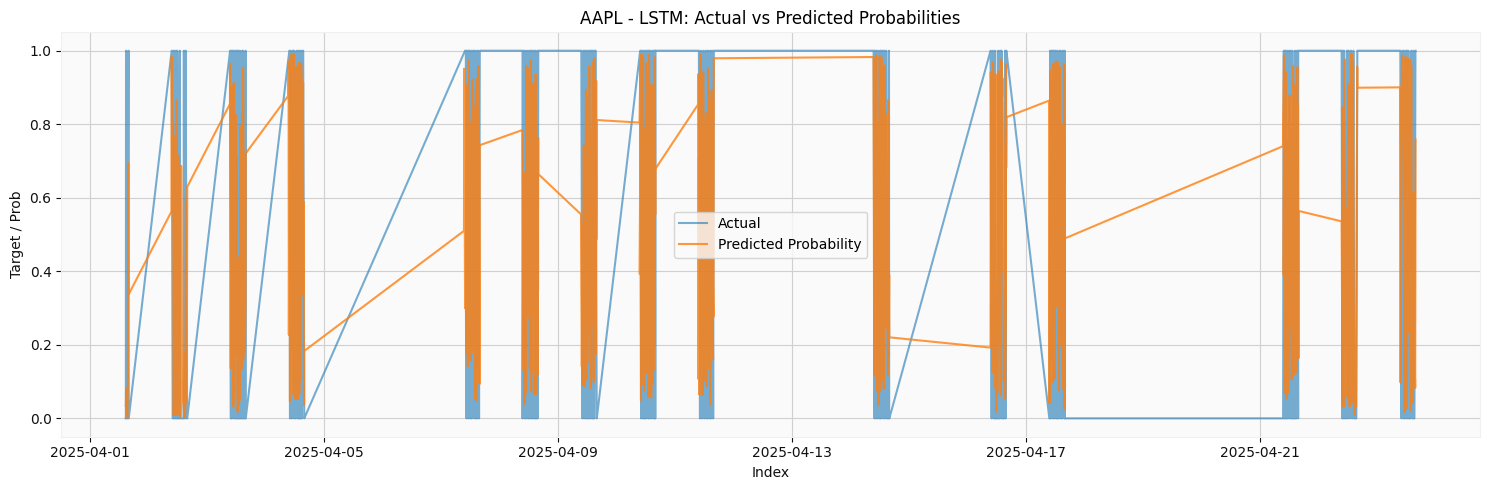

💰 Backtest for AAPL
- Strategy Return: $1057.19
- Buy & Hold     : $-760.86
- Trades Executed: 338


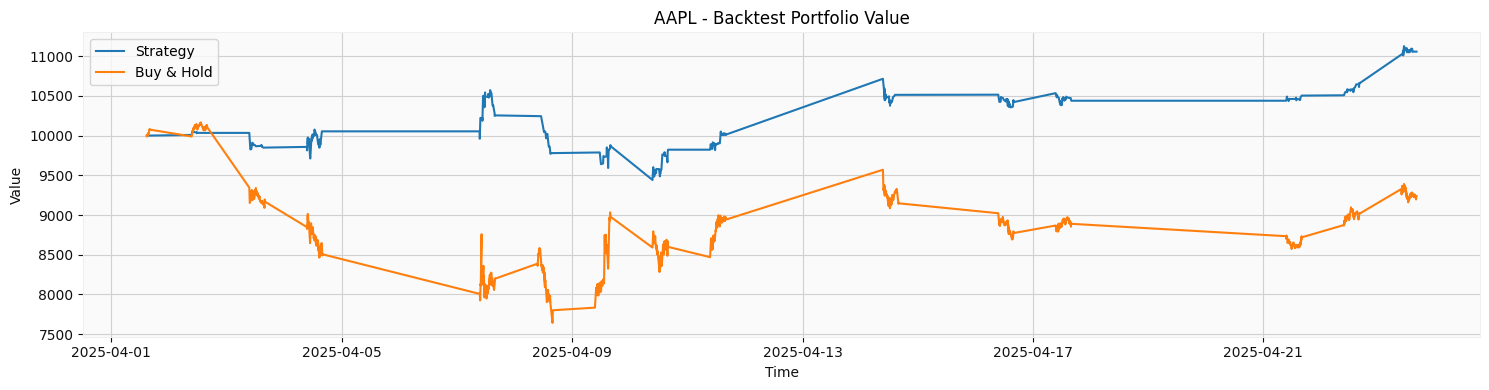

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
⚡ Avg Inference Time per sample: 0.34 ms

📊 MSFT - LSTM Results
Accuracy : 0.569
Precision: 0.675
Recall   : 0.528
F1 Score : 0.592
Win Rate : 67.50% (1730/2563)
[[1411  833]
 [1549 1730]]


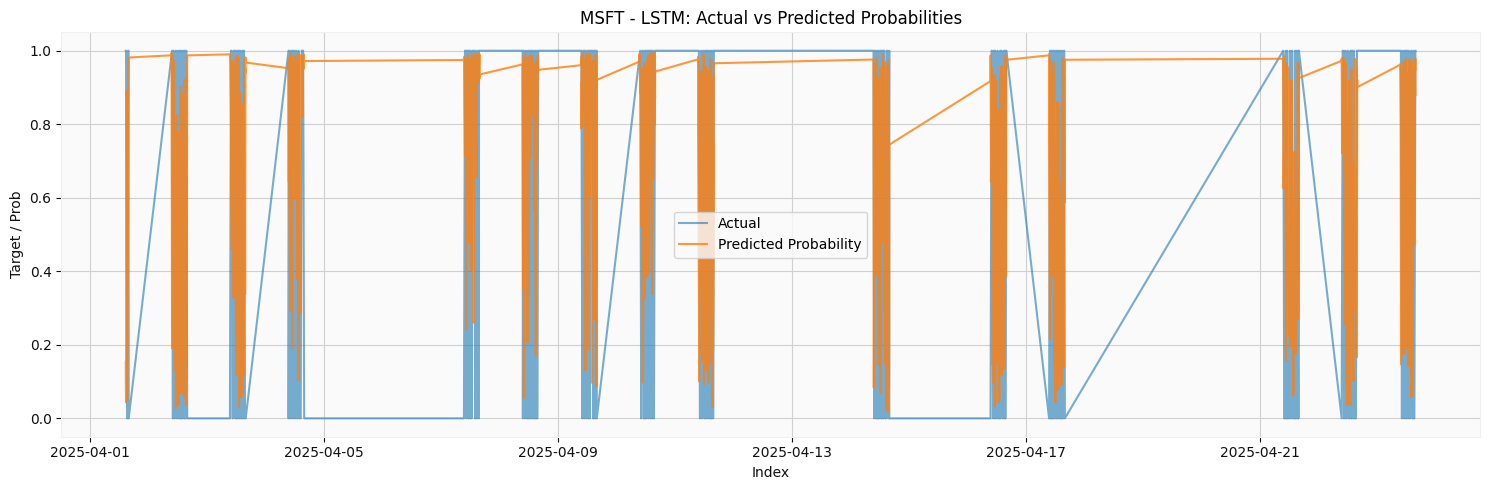

💰 Backtest for MSFT
- Strategy Return: $112.52
- Buy & Hold     : $-134.82
- Trades Executed: 441


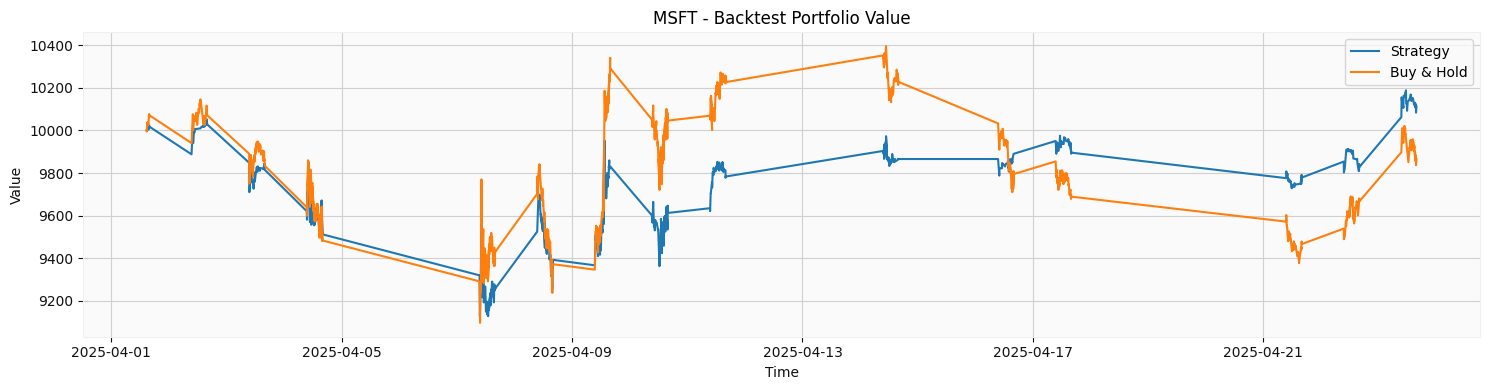

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
⚡ Avg Inference Time per sample: 0.34 ms

📊 MSTR - LSTM Results
Accuracy : 0.651
Precision: 0.855
Recall   : 0.698
F1 Score : 0.768
Win Rate : 85.45% (3190/3733)
[[ 397  543]
 [1379 3190]]


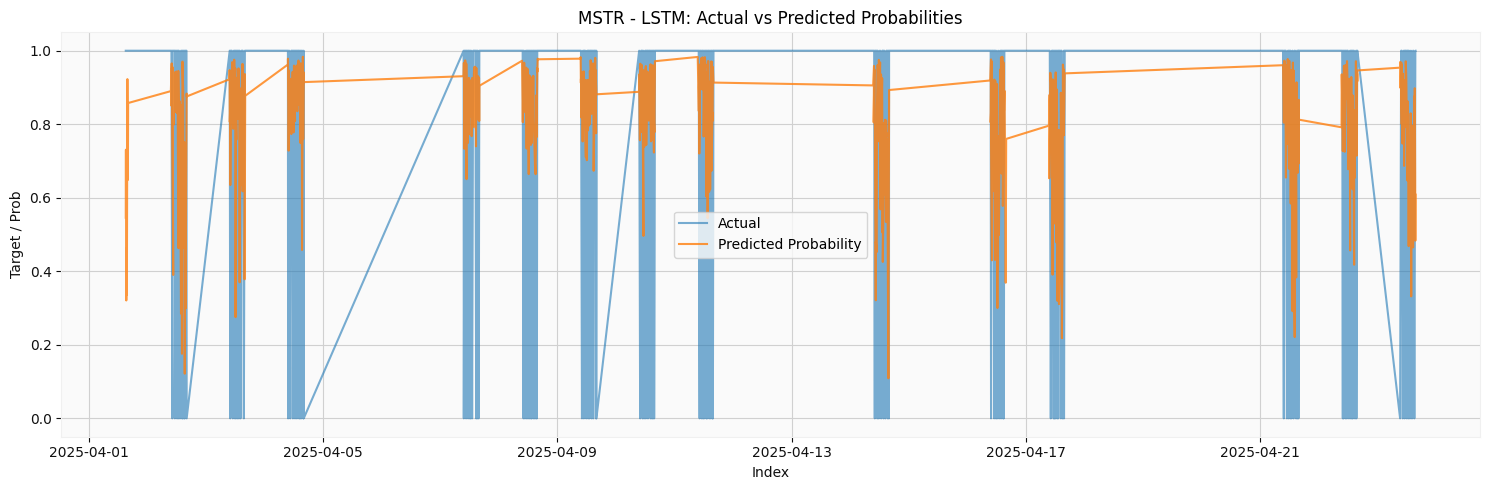

💰 Backtest for MSTR
- Strategy Return: $1732.64
- Buy & Hold     : $1645.23
- Trades Executed: 354


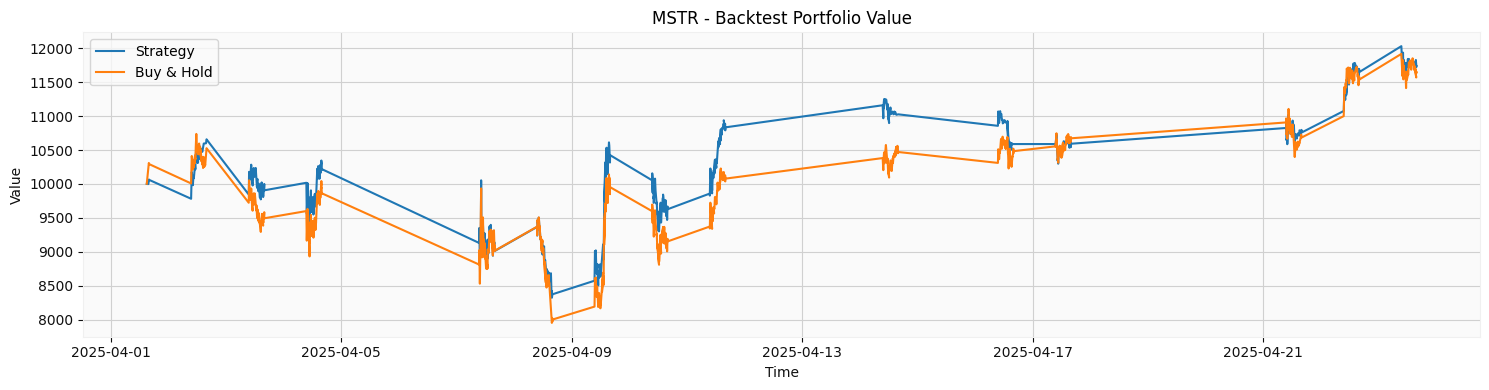

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
⚡ Avg Inference Time per sample: 0.34 ms

📊 NVDA - LSTM Results
Accuracy : 0.641
Precision: 0.506
Recall   : 0.341
F1 Score : 0.408
Win Rate : 50.59% (683/1350)
[[2856  667]
 [1318  683]]


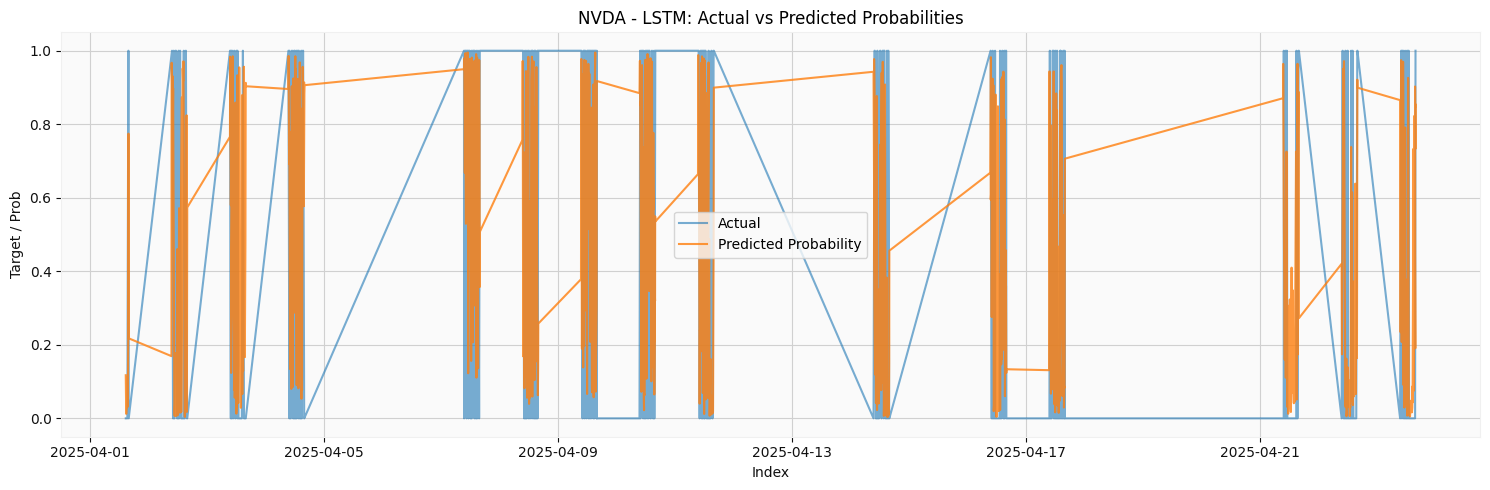

💰 Backtest for NVDA
- Strategy Return: $-23.65
- Buy & Hold     : $-521.19
- Trades Executed: 275


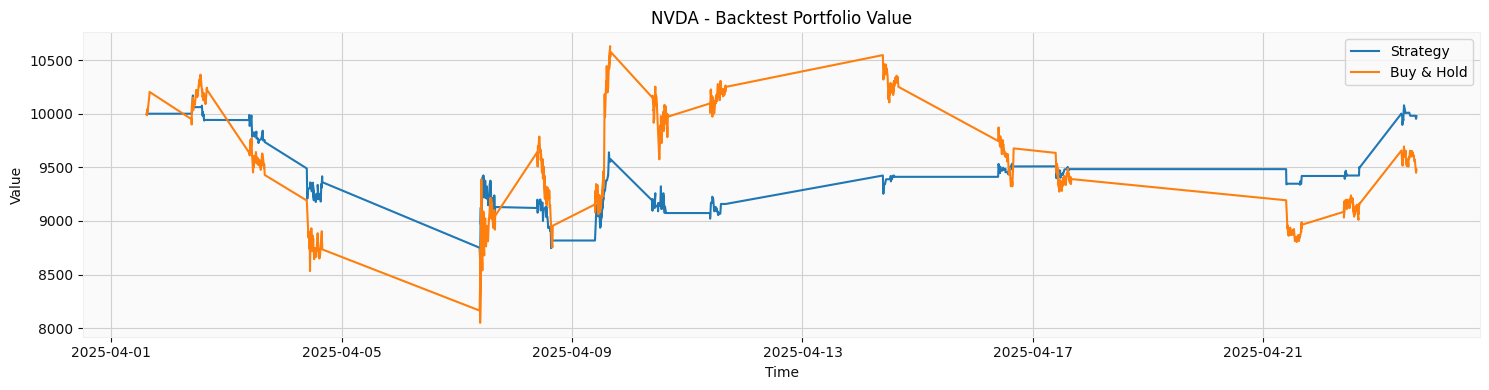

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
⚡ Avg Inference Time per sample: 0.35 ms

📊 SMCI - LSTM Results
Accuracy : 0.902
Precision: 0.343
Recall   : 0.046
F1 Score : 0.081
Win Rate : 34.29% (24/70)
[[4957   46]
 [ 496   24]]


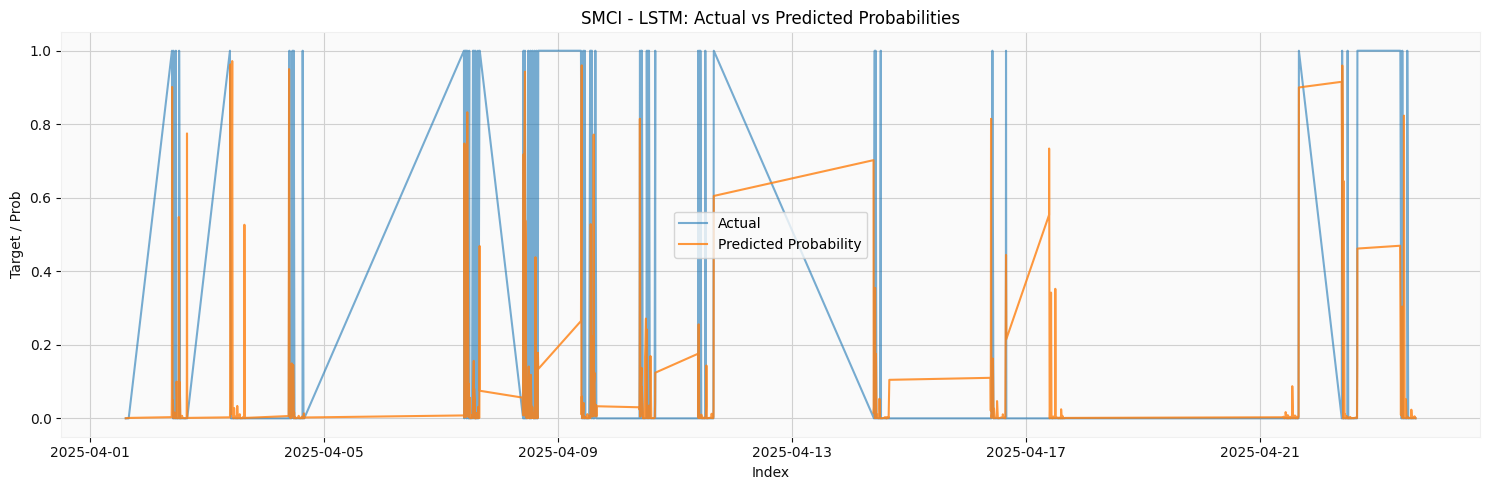

💰 Backtest for SMCI
- Strategy Return: $987.98
- Buy & Hold     : $-527.61
- Trades Executed: 30


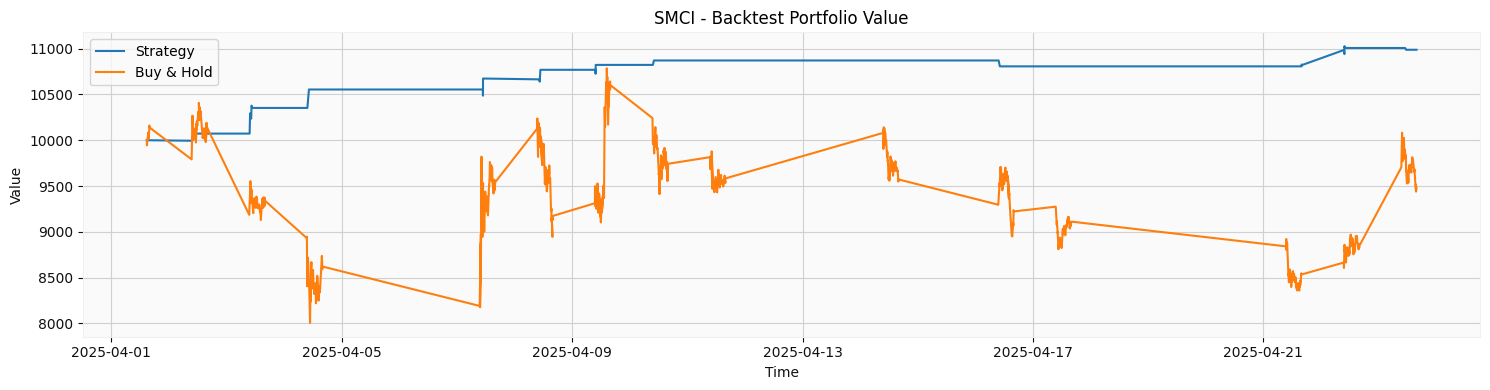

In [12]:
# ====== PARAMETERS ======
SEQ_LEN = 20              # Number of past time steps (lookback window) for LSTM input
THRESHOLD = 0.8           # Probability threshold to classify a signal as a "buy"
INITIAL_CAPITAL = 10000   # Starting capital for backtesting

# ====== HELPER FUNCTIONS ======

# Reshape 2D features into 3D shape for LSTM: [samples, timesteps, features]
def reshape_for_lstm(X, seq_len):
    return np.array([X[i - seq_len:i] for i in range(seq_len, len(X))])

# Build a simple LSTM model for binary classification
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))  # Dropout for regularization
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output probability
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
    return model

# Evaluate strategy vs. buy & hold using predicted signals
def backtest_strategy(df, price_col='time_series_close'):
    df = df.copy()
    df = df[df['prediction'].notna()]

    # Calculate price returns
    df['returns'] = df[price_col].pct_change()

    # Strategy returns only when signal == 1
    df['strategy_returns'] = df['signal'].shift(1, fill_value=0) * df['returns']

    # Track portfolio value
    df['strategy_value'] = (1 + df['strategy_returns']).cumprod() * INITIAL_CAPITAL
    df['buy_hold_value'] = (1 + df['returns']).cumprod() * INITIAL_CAPITAL

    # Return dataframe, strategy profit, buy & hold profit, number of trades
    return df, df['strategy_value'].iloc[-1] - INITIAL_CAPITAL, df['buy_hold_value'].iloc[-1] - INITIAL_CAPITAL, df['signal'].diff().abs().sum()

# Plot model predictions vs. actuals
def plot_predictions(index, actual, predicted, ticker):
    plt.figure(figsize=(15, 5))
    plt.plot(index, actual, label='Actual', alpha=0.6)
    plt.plot(index, predicted, label='Predicted Probability', alpha=0.8)
    plt.title(f"{ticker} - LSTM: Actual vs Predicted Probabilities")
    plt.xlabel("Index")
    plt.ylabel("Target / Prob")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot strategy performance vs. buy & hold
def plot_backtest(df, ticker):
    plt.figure(figsize=(15, 4))
    plt.plot(df.index, df['strategy_value'], label='Strategy')
    plt.plot(df.index, df['buy_hold_value'], label='Buy & Hold')
    plt.title(f"{ticker} - Backtest Portfolio Value")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ====== MAIN PIPELINE ======

for ticker, df in ticker_dfs.items():
    df = df.copy()

    # Define input features (excluding target)
    feature_cols = [col for col in df.columns if col != 'target']

    # Ensure all feature columns are numeric
    df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')
    df = df.dropna(subset=feature_cols + ['target'])

    # Skip tickers with insufficient data
    if len(df) < SEQ_LEN + 50:
        print(f"{ticker}: Skipping due to insufficient data.")
        continue

    # Prepare X and y for LSTM
    X = df[feature_cols].values
    y = df['target'].astype(int).values

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Reshape for LSTM input
    X_lstm = reshape_for_lstm(X_scaled, SEQ_LEN)
    y_lstm = y[SEQ_LEN:]

    # Train/Test split (80/20)
    split = int(len(X_lstm) * 0.8)
    X_train, X_test = X_lstm[:split], X_lstm[split:]
    y_train, y_test = y_lstm[:split], y_lstm[split:]

    # Build and train LSTM model
    model = create_lstm_model((SEQ_LEN, X_train.shape[2]))
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

    start_time = time.time()
    # Predict probabilities and apply threshold
    y_probs = model.predict(X_test).flatten()
    inference_time = (time.time() - start_time) / len(X_test) * 1000  # ms per sample
    print(f"⚡ Avg Inference Time per sample: {inference_time:.2f} ms")
    y_pred = (y_probs > THRESHOLD).astype(int)

    # Evaluate metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    acc = accuracy_score(y_test, y_pred)

    # Calculate win rate
    wins = ((y_pred == 1) & (y_test == 1)).sum()
    total_buys = (y_pred == 1).sum()
    win_rate = wins / total_buys if total_buys > 0 else 0

    # Output evaluation results
    print(f"\n📊 {ticker} - LSTM Results")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall   : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"Win Rate : {win_rate:.2%} ({wins}/{total_buys})")
    print(confusion_matrix(y_test, y_pred))

    # Store predictions and signals in DataFrame
    df['prediction'] = np.nan
    df.iloc[-len(y_test):, df.columns.get_loc('prediction')] = y_probs
    df['signal'] = 0
    df.loc[df['prediction'] > THRESHOLD, 'signal'] = 1

    # Plot predictions
    test_idx = df.iloc[-len(y_test):].index
    plot_predictions(test_idx, y_test, y_probs, ticker)

    # Run and visualize backtest
    test_df, strat_ret, hold_ret, trades = backtest_strategy(df)
    print(f"💰 Backtest for {ticker}")
    print(f"- Strategy Return: ${strat_ret:.2f}")
    print(f"- Buy & Hold     : ${hold_ret:.2f}")
    print(f"- Trades Executed: {int(trades)}")
    plot_backtest(test_df, ticker)

    # Optional: store results
    # ticker_dfs[ticker] = df


🚀📊 **10. XGBoost-Based Signal Prediction & Backtesting Framework**

> *Train an XGBoost classifier to generate high-probability buy signals, evaluate precision, and simulate a strategy vs. buy & hold.*

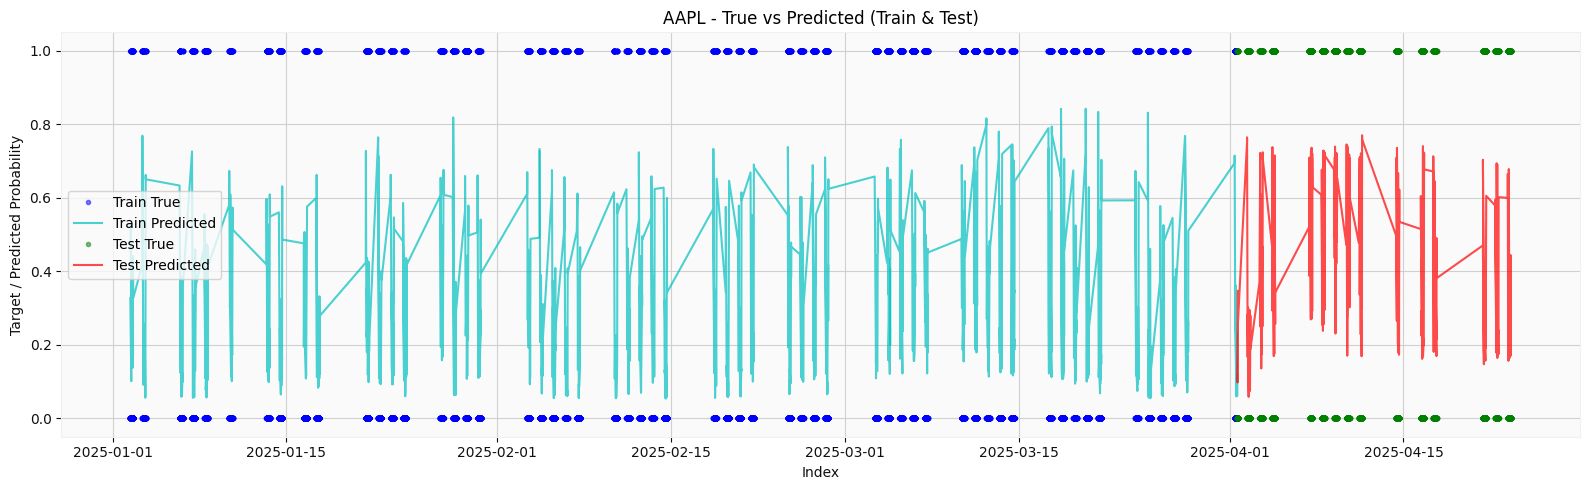

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AAPL: Precision on test set: 0.000


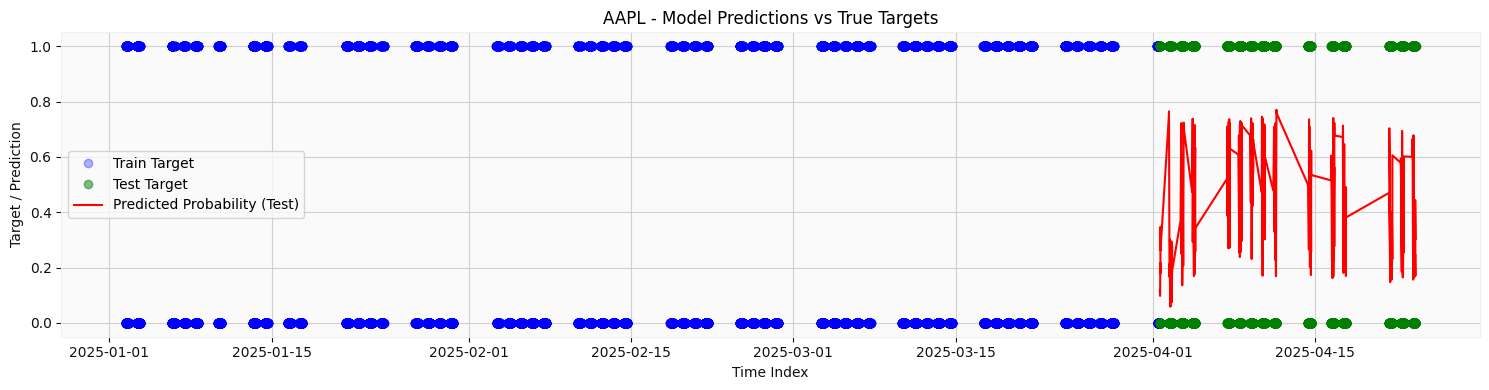

AAPL Backtest Results:
- Strategy Return   : $0.00
- Buy & Hold Return : $-753.34
- Number of Trades  : 0.0


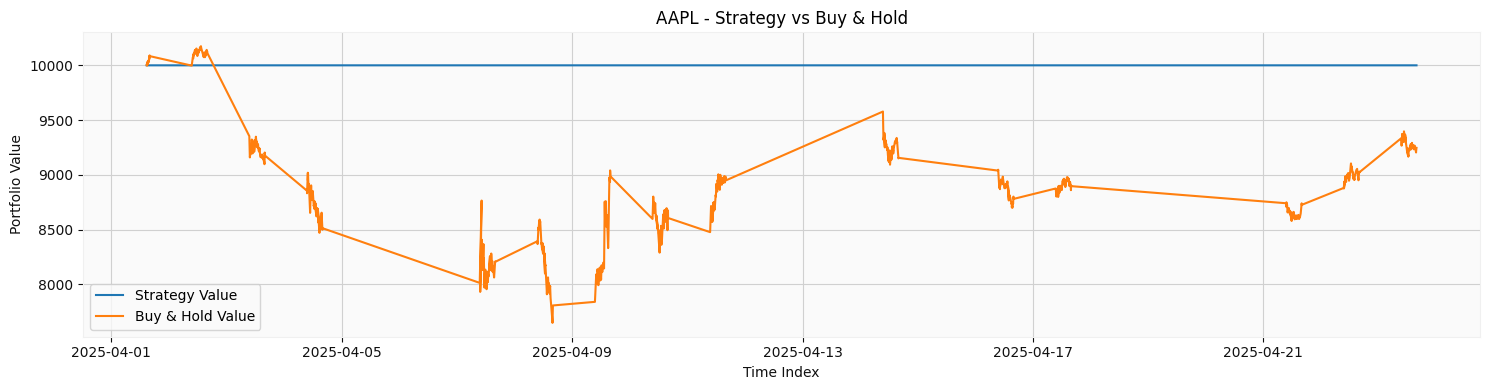

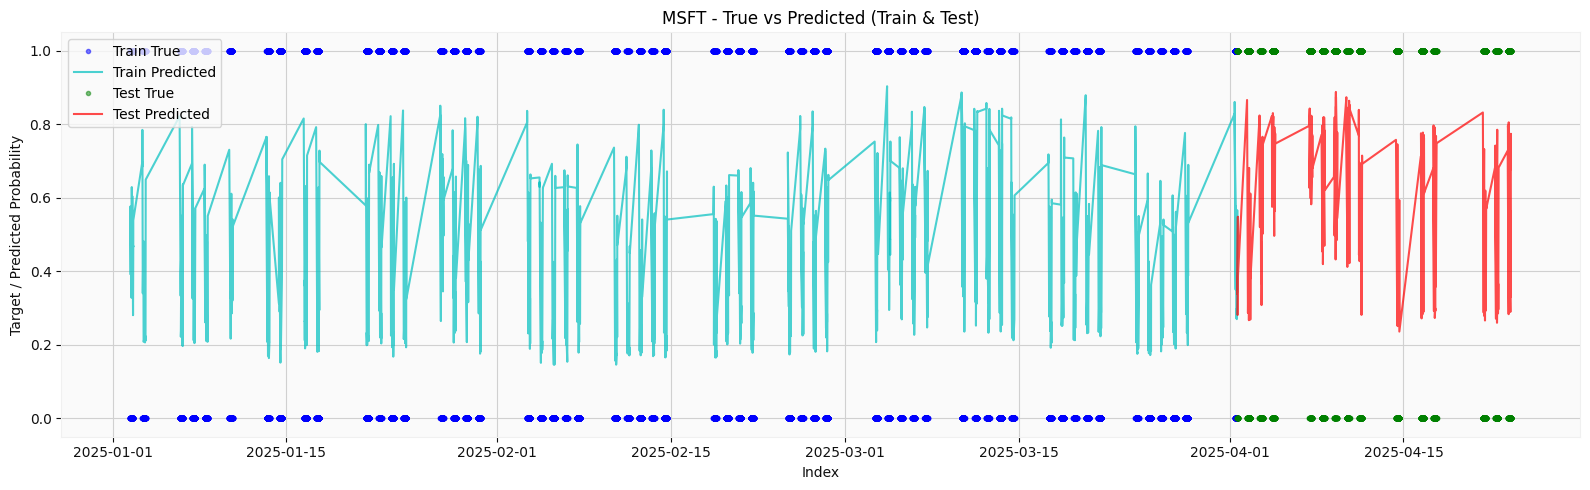

MSFT: Precision on test set: 0.902


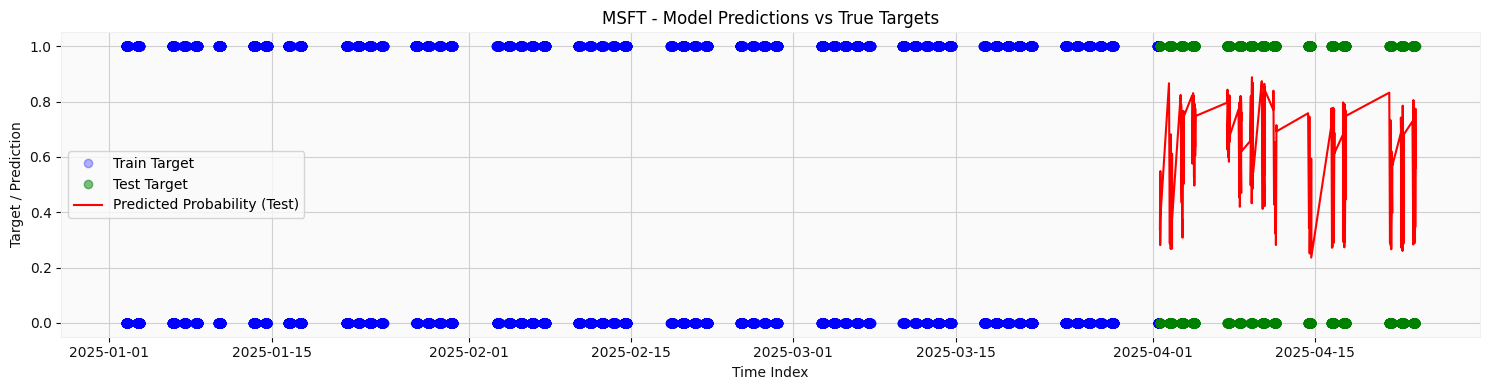

MSFT Backtest Results:
- Strategy Return   : $1043.85
- Buy & Hold Return : $-138.46
- Number of Trades  : 128.0


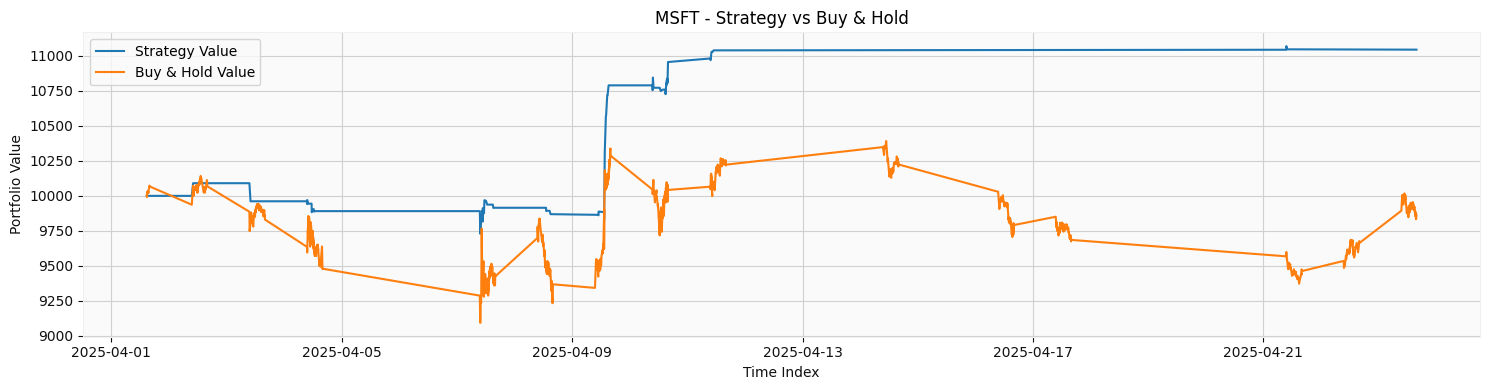

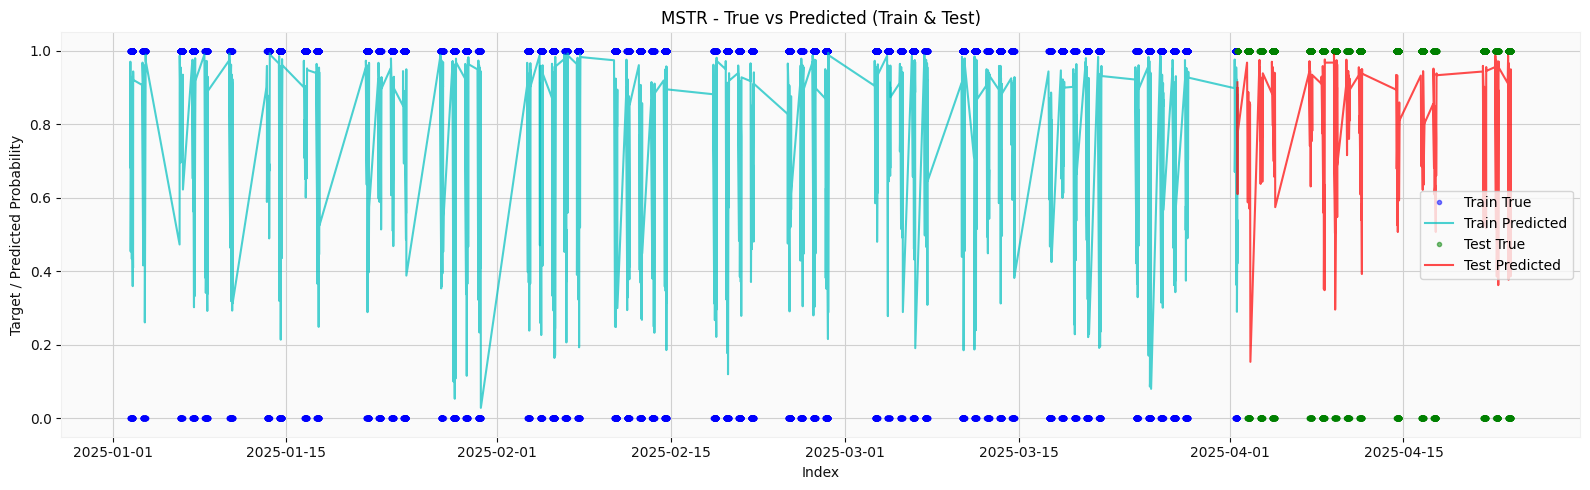

MSTR: Precision on test set: 0.916


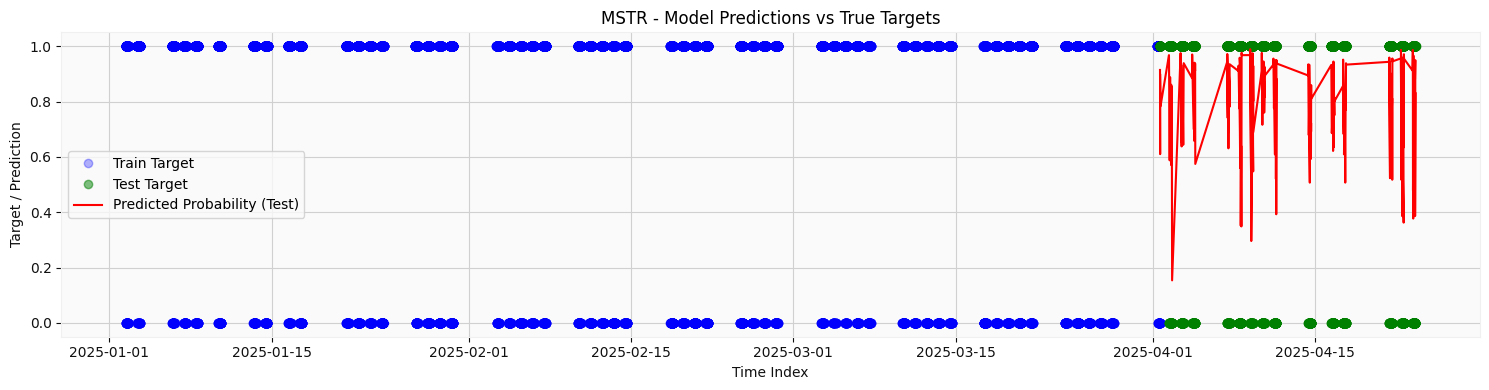

MSTR Backtest Results:
- Strategy Return   : $28428.80
- Buy & Hold Return : $1707.16
- Number of Trades  : 854.0


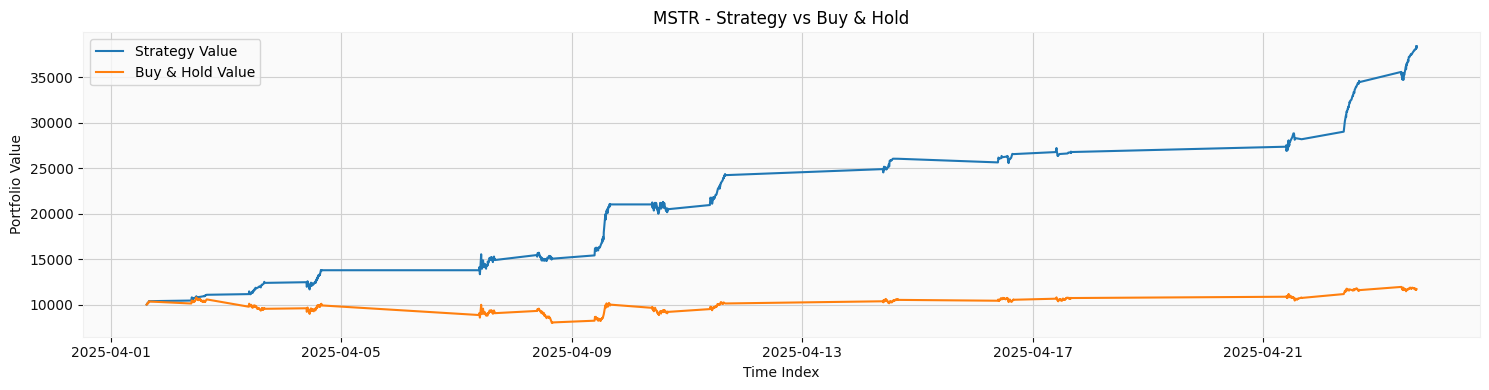

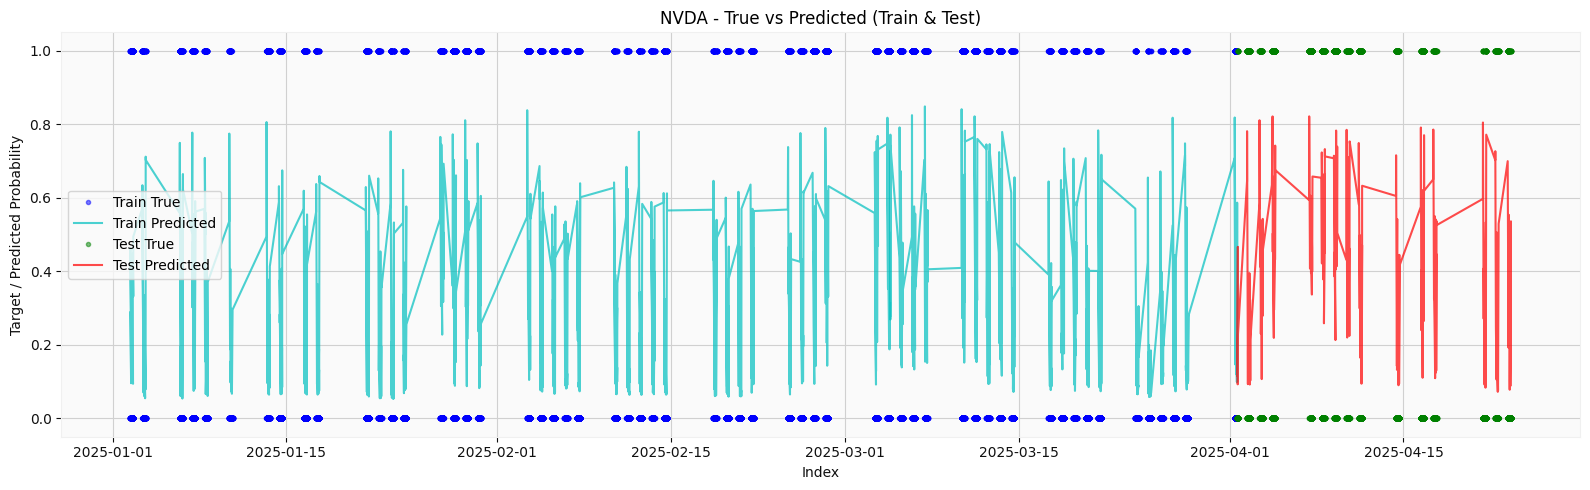

NVDA: Precision on test set: 0.727


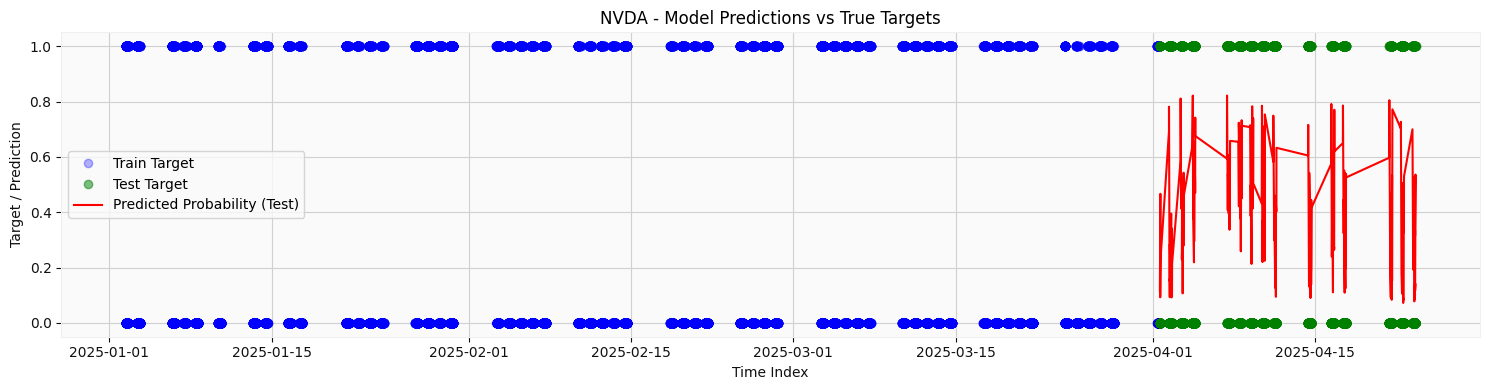

NVDA Backtest Results:
- Strategy Return   : $145.34
- Buy & Hold Return : $-517.81
- Number of Trades  : 14.0


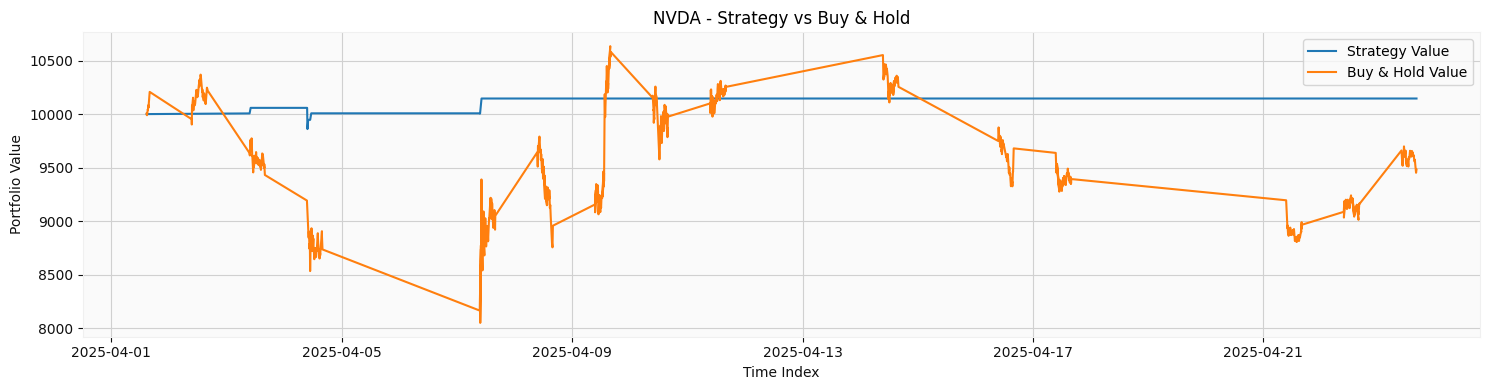

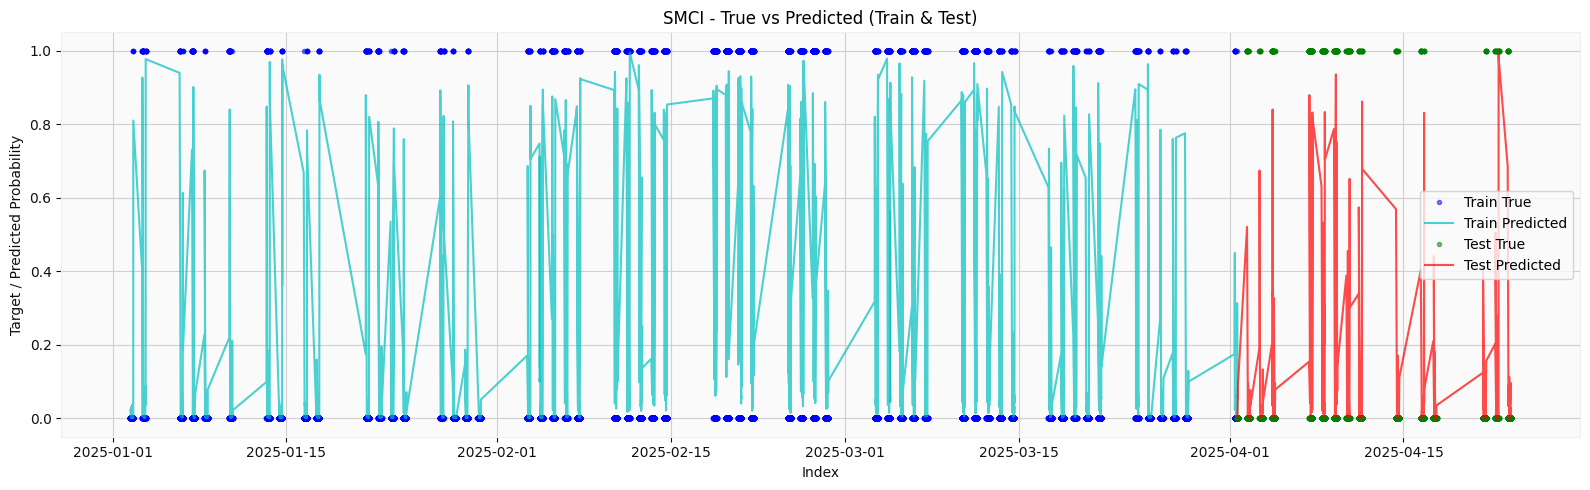

SMCI: Precision on test set: 1.000


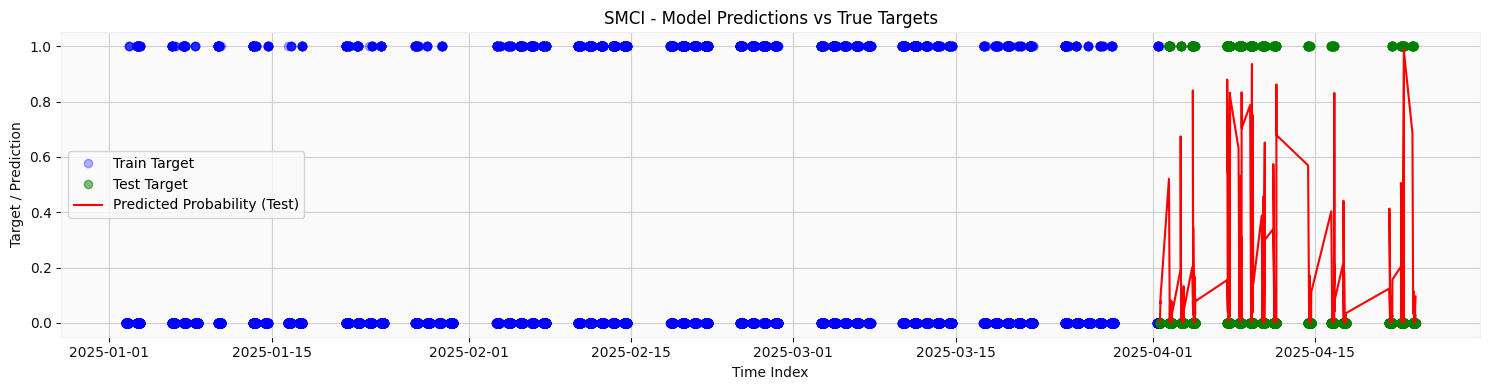

SMCI Backtest Results:
- Strategy Return   : $2734.47
- Buy & Hold Return : $-531.72
- Number of Trades  : 24.0


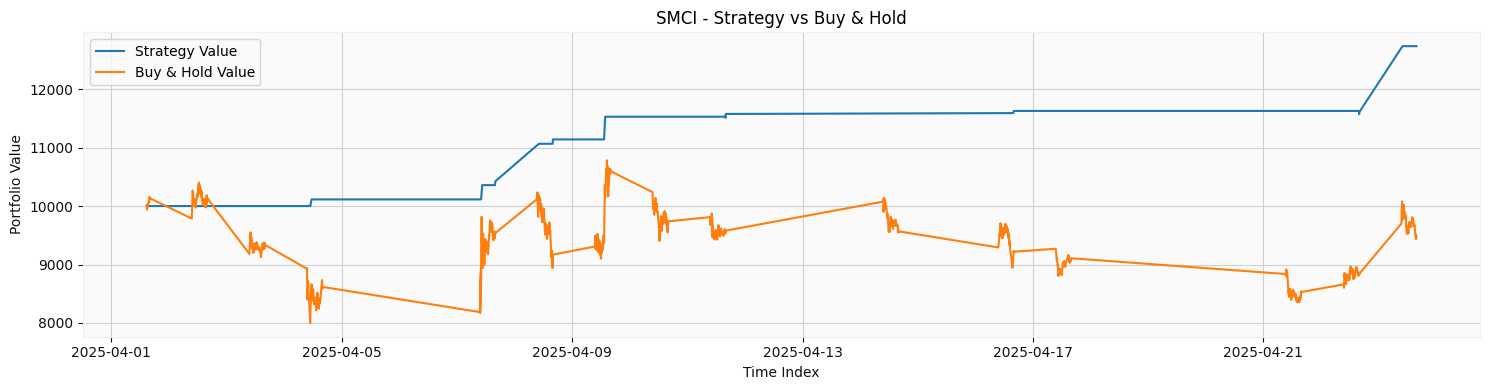

In [14]:

# Backup original data
temp = ticker_dfs

# ========== 📌 Strategy Simulation ==========
def backtest_strategy(df, initial_capital=10000, price_col='time_series_close'):
    """
    Simulate a long-only trading strategy based on model-generated signals.
    Returns: updated test dataframe, strategy return, buy & hold return, and number of trades executed.
    """
    df = df.copy()
    test_df = df[df['prediction'].notna()].copy()  # Use test period only

    # Compute returns
    test_df['returns'] = test_df[price_col].pct_change()
    test_df['strategy_returns'] = test_df['signal'].shift(1, fill_value=0) * test_df['returns']

    # Portfolio value over time
    test_df['strategy_value'] = (1 + test_df['strategy_returns']).cumprod() * initial_capital
    test_df['buy_hold_value'] = (1 + test_df['returns']).cumprod() * initial_capital

    # Key metrics
    total_return = test_df['strategy_value'].iloc[-1] - initial_capital
    buy_hold_return = test_df['buy_hold_value'].iloc[-1] - initial_capital
    num_trades = test_df['signal'].diff().abs().sum()

    return test_df, total_return, buy_hold_return, num_trades

# ========== 📈 Prediction Visualization ==========
def plot_predictions(df, y_train_idx, y_train, y_test_idx, y_test, ticker):
    """
    Plot actual targets (train/test) and predicted probabilities for visual inspection.
    """
    plt.figure(figsize=(15, 4))
    plt.plot(y_train_idx, y_train, 'bo', label='Train Target', alpha=0.3)
    plt.plot(y_test_idx, y_test, 'go', label='Test Target', alpha=0.5)
    plt.plot(y_test_idx, df.loc[y_test_idx, 'prediction'], 'r-', label='Predicted Probability (Test)')
    plt.title(f"{ticker} - Model Predictions vs True Targets")
    plt.xlabel("Time Index")
    plt.ylabel("Target / Prediction")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ========== 💹 Strategy Performance Plot ==========
def plot_backtest(test_df, ticker):
    """
    Plot the cumulative portfolio value for strategy vs buy & hold.
    """
    plt.figure(figsize=(15, 4))
    plt.plot(test_df.index, test_df['strategy_value'], label='Strategy Value')
    plt.plot(test_df.index, test_df['buy_hold_value'], label='Buy & Hold Value')
    plt.title(f"{ticker} - Strategy vs Buy & Hold")
    plt.xlabel("Time Index")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ========== 🧠 Per-Ticker Training & Backtesting Pipeline ==========
for ticker, df in temp.items():
    df = df.copy()

    # 1. Convert all features to numeric
    feature_cols = [col for col in df.columns if col != 'target']
    for col in feature_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 2. Drop any rows with NaNs in features or target
    df = df.dropna(subset=feature_cols + ['target'])
    if len(df) < 20:
        print(f"{ticker}: Not enough data after cleaning, skipping.")
        continue

    # 3. Prepare X (features) and y (target)
    X = df[feature_cols]
    y = df['target'].astype(int)

    # 4. Time-based split (80% train / 20% test)
    split_idx = int(len(df) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # 5. Train XGBoost model
    model = XGBClassifier(
        objective='binary:logistic',
        n_estimators=1000,
        learning_rate=0.01,
        eval_metric='logloss',
        early_stopping_rounds=50,
        use_label_encoder=False,
        verbosity=0
    )
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )

    # 6. Predict probabilities
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    # 7. Visualize actual vs predicted probabilities (train & test)
    plt.figure(figsize=(16, 5))
    plt.plot(y_train.index, y_train, 'b.', alpha=0.5, label='Train True')
    plt.plot(y_train.index, y_train_pred, 'c-', alpha=0.7, label='Train Predicted')
    plt.plot(y_test.index, y_test, 'g.', alpha=0.5, label='Test True')
    plt.plot(y_test.index, y_test_pred, 'r-', alpha=0.7, label='Test Predicted')
    plt.title(f"{ticker} - True vs Predicted (Train & Test)")
    plt.xlabel("Index")
    plt.ylabel("Target / Predicted Probability")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 8. Store predictions and trading signals
    df['prediction'] = np.nan
    df.loc[X_test.index, 'prediction'] = y_test_pred
    df['signal'] = 0
    df.loc[df['prediction'] > 0.8, 'signal'] = 1

    # 9. Print test precision
    preds = (df.loc[X_test.index, 'prediction'] > 0.8).astype(int)
    precision = precision_score(y_test, preds)
    print(f"{ticker}: Precision on test set: {precision:.3f}")

    # 10. Plot prediction overview
    plot_predictions(df, y_train.index, y_train, y_test.index, y_test, ticker)

    # 11. Run backtest and visualize performance
    test_df, strategy_return, buy_hold_return, num_trades = backtest_strategy(df)
    print(f"{ticker} Backtest Results:")
    print(f"- Strategy Return   : ${strategy_return:.2f}")
    print(f"- Buy & Hold Return : ${buy_hold_return:.2f}")
    print(f"- Number of Trades  : {num_trades}")
    plot_backtest(test_df, ticker)

    # 12. Save updated results into global store
    ticker_dfs[ticker] = df